In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

In [15]:
# Load and normalize the Fashion-MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)  # shape → (60000, 28, 28, 1)
x_test  = np.expand_dims(x_test,  -1)  # shape → (10000, 28, 28, 1)

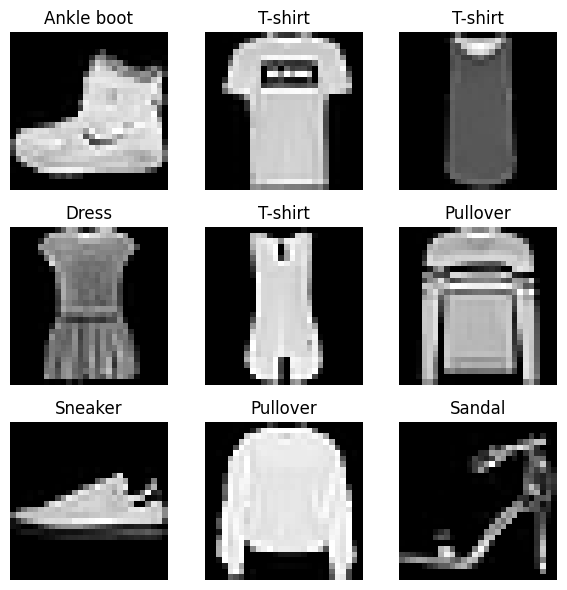

In [16]:
# Show a few training samples
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [28]:
# Build the CNN
model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Train
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    verbose=2
)

Epoch 1/10
844/844 - 11s - 13ms/step - accuracy: 0.7636 - loss: 0.6433 - val_accuracy: 0.8520 - val_loss: 0.3971
Epoch 2/10
844/844 - 10s - 12ms/step - accuracy: 0.8546 - loss: 0.4082 - val_accuracy: 0.8807 - val_loss: 0.3199
Epoch 3/10
844/844 - 11s - 13ms/step - accuracy: 0.8781 - loss: 0.3430 - val_accuracy: 0.8930 - val_loss: 0.2919
Epoch 4/10
844/844 - 10s - 12ms/step - accuracy: 0.8910 - loss: 0.3060 - val_accuracy: 0.8980 - val_loss: 0.2753
Epoch 5/10
844/844 - 10s - 12ms/step - accuracy: 0.9002 - loss: 0.2766 - val_accuracy: 0.9058 - val_loss: 0.2675
Epoch 6/10
844/844 - 10s - 12ms/step - accuracy: 0.9059 - loss: 0.2574 - val_accuracy: 0.9030 - val_loss: 0.2692
Epoch 7/10
844/844 - 10s - 12ms/step - accuracy: 0.9130 - loss: 0.2392 - val_accuracy: 0.9037 - val_loss: 0.2686
Epoch 8/10
844/844 - 10s - 12ms/step - accuracy: 0.9179 - loss: 0.2250 - val_accuracy: 0.9073 - val_loss: 0.2549
Epoch 9/10
844/844 - 12s - 14ms/step - accuracy: 0.9236 - loss: 0.2098 - val_accuracy: 0.9127 - 

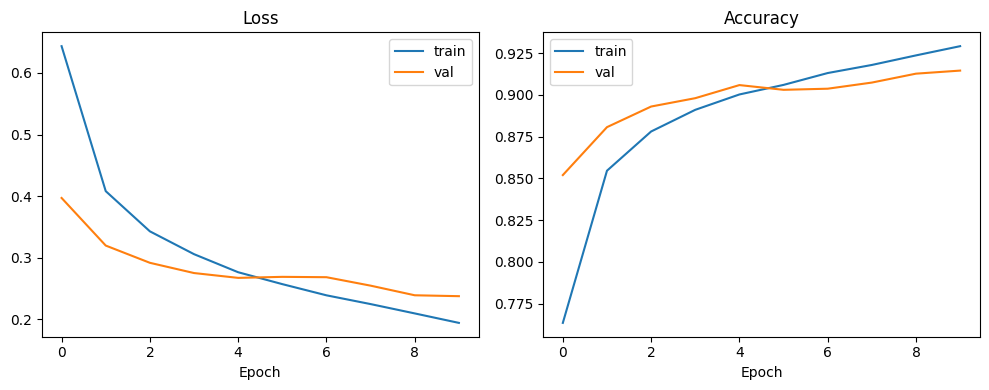

In [31]:
# Plot loss & accuracy
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],    label='train')
plt.plot(history.history['val_loss'],label='val')
plt.title('Loss'); plt.xlabel('Epoch'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],    label='train')
plt.plot(history.history['val_accuracy'],label='val')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.legend()

plt.tight_layout()
plt.show()

In [32]:
# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Final Test loss: {test_loss:.4f}")
print(f"Final Test accuracy: {test_acc:.4f}")

Final Test loss: 0.2581
Final Test accuracy: 0.9114
